In [ ]:
#run this
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
import json

def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

In [ ]:
# loading business dataset
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Load Business File
id = '1Z5gNcSs7SE81RFz6_0HCISTCU4TTm7KY' 
downloaded1 = drive.CreateFile({'id':id}) 
downloaded1.GetContentFile('yelp_academic_dataset_business.json')  

In [ ]:
businesses = pd.read_json('yelp_academic_dataset_business.json',lines = True, orient='columns')
print("Yelp academic business dataset",businesses.shape)

Yelp academic business dataset (150346, 14)


In [ ]:
businesses['categories'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object>

In [ ]:
"""size = 1000000
reviews = pd.read_json("drive/MyDrive/Yelp dataset/yelp_academic_dataset_review.json", lines=True,orient='columns',
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)"""

'size = 1000000\nreviews = pd.read_json("drive/MyDrive/Yelp dataset/yelp_academic_dataset_review.json", lines=True,orient=\'columns\',\n                      dtype={\'review_id\':str,\'user_id\':str,\n                             \'business_id\':str,\'stars\':int,\n                             \'date\':str,\'text\':str,\'useful\':int,\n                             \'funny\':int,\'cool\':int},\n                      chunksize=size)'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
reviews = read_json('drive/MyDrive/Yelp dataset/yelp_academic_dataset_review.json')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
reviews.shape

In [ ]:
reviews.head()

In [ ]:
businesses.head(5)

In [ ]:
# selecting only California region
business=businesses[businesses['state'].isin(['CA'])].reset_index(drop=True)

In [ ]:
businesses.info()

In [ ]:
business['city'] = business['city'].str.replace(' ','_')

In [ ]:
business['city'].value_counts(dropna=False)

Santa_Barbara                       3829
Goleta                               798
Carpinteria                          298
Isla_Vista                            94
Montecito                             93
Summerland                            41
Truckee                               11
Santa_Barbara_                         5
Reno                                   3
Santa_Barbra                           2
South_Lake_Tahoe                       1
Santa_Barbara,                         1
Spring_Hill                            1
Aliso_Viejo                            1
SANTA_BARBARA_AP                       1
Costa_Mesa                             1
Santa_Barbara_&_Ventura_Counties       1
SANTA_BARBARA                          1
Valencia                               1
Santa__Barbara                         1
Salinas                                1
Carpinteria_                           1
Real_Goleta                            1
Cerritos                               1
Santa_Clara     

In [ ]:
business['city'] = business['city'].str.replace('Santa_Barbara_','Santa_Barbara')
business['city'] = business['city'].str.replace('Santa_Barbra','Santa_Barbara')
business['city'] = business['city'].str.replace('SANTA_BARBARA_AP','Santa_Barbara')
business['city'] = business['city'].str.replace('Santa_Barbara_&_Ventura_Counties','Santa_Barbara')
business['city'] = business['city'].str.replace('SANTA_BARBARA','Santa_Barbara')
business['city'] = business['city'].str.replace('santa_Barbara','Santa_Barbara')
business['city'] = business['city'].str.replace('Santa__Barbara','Santa_Barbara')
business['city'] = business['city'].str.replace('Santa_Barbara,','Santa_Barbara')
business['city'] = business['city'].str.replace('Carpinteria_','Carpinteria')
business['city'] = business['city'].str.replace('Santa_Barbara&_Ventura_Counties','Santa_Barbara')

In [ ]:
business['city'] = business['city'].str.replace('_',' ')

In [ ]:
business['city'].value_counts(dropna=False)

In [ ]:
business = business[business['is_open'].isin([1])].reset_index(drop=True)

In [ ]:
print("------After taking only opened businessess----")
print("\nYelp academic business dataset \n Rows: ", business.shape[0] , "\n Columns:" , business.shape[1])

In [ ]:
business.drop(['is_open'], axis=1,inplace=True)

In [ ]:
business=business[business["categories"].str.contains("Restaurant",na=False, case=False)]
business.head()

In [ ]:
business['city'].value_counts(dropna=False)

In [ ]:
business.isna().sum()

---
- It seems some businesses haven't mentioned their opening and closing hours. There some of the records are empty.

- Some businesses might not be having any attributes mentioned in yelp.

- we don't need hours column, therefore, we will drop hours column.

In [ ]:
business.drop(['hours'], axis=1,inplace=True)

In [ ]:
business.head()

In [ ]:
business.shape

Load File

In [ ]:
reviews=pd.merge(reviews,business,on='business_id',how='inner')
reviews.head()

NameError: ignored

In [ ]:
reviews.shape

In [ ]:
reviews['business_id'].value_counts(dropna=False)

In [ ]:
reviews.info()

In [ ]:
reviews.head(5)

In [ ]:
#Determining the Null Value Data
round(( reviews.isna().sum()/len(reviews) ) * 100).sort_values(ascending=False)

---
It seems there are no nulls in the dataset after sorting the dataset for California and merging the reviews.

In [ ]:
#Determining the Null Value Data
reviews.describe()

---
Overall, dataset look clean to me. But it seems there can be some biased values in review_count as there are quite high Max value is 3834 whereas mean is 177.62 only. It shows that there can be some outliers.

---

In [ ]:
reviews.describe(include = 'object')

In [ ]:
reviews['city'].value_counts()

In [ ]:
review=reviews[reviews['city']=='Santa Barbara']
review.shape

In [ ]:
review.to_csv('review_merge.csv'n index=False)

## Load Merged


In [ ]:
#Start here

#Copy Merged file to local google colab storage
!gdown --id 10mI70Ga8XgXgoQyMhVU2e7hsxNDOEytU

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10mI70Ga8XgXgoQyMhVU2e7hsxNDOEytU
To: /content/review_merge.csv
100% 234M/234M [00:01<00:00, 176MB/s]


In [ ]:
# Load merged file
Business_reviews = pd.read_csv('review_merge.csv')
print("Yelp academic business dataset",Business_reviews.shape)

Yelp academic business dataset (130445, 21)


In [ ]:
Business_reviews.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories
0,0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,...,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
1,1,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1.0,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59,...,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
2,2,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3.0,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35,...,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
3,3,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5.0,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38,...,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
4,4,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4.0,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54,...,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"


In [ ]:
Business_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130445 entries, 0 to 130444
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    130445 non-null  int64  
 1   review_id     130445 non-null  object 
 2   user_id       130445 non-null  object 
 3   business_id   130445 non-null  object 
 4   stars_x       130445 non-null  float64
 5   useful        130445 non-null  int64  
 6   funny         130445 non-null  int64  
 7   cool          130445 non-null  int64  
 8   text          130445 non-null  object 
 9   date          130445 non-null  object 
 10  name          130445 non-null  object 
 11  address       130369 non-null  object 
 12  city          130445 non-null  object 
 13  state         130445 non-null  object 
 14  postal_code   130445 non-null  int64  
 15  latitude      130445 non-null  float64
 16  longitude     130445 non-null  float64
 17  stars_y       130445 non-null  float64
 18  revi

In [ ]:
Business_reviews.drop(columns='Unnamed: 0', axis=1, inplace=True)

---
## Outliers

---

In [ ]:
# Finding Threshholds from each numeric feature
def find_thresholds (data):   
    table=pd.DataFrame(columns = data.select_dtypes(include=['float64','int64']).columns, index = ["Q1", "Q3","IQR", 'min', "max", "lowertreshold", "uppertreshold"])
    for col in data.select_dtypes(include=['int64','float64']).columns :
        Q1 = data[col].quantile(q=0.25)
        Q3 = data[col].quantile(q=0.75)
        IQR = Q3-Q1
        table.loc["Q1"][col] = Q1
        table.loc["Q3"][col] = Q3
        table.loc["IQR"][col] = IQR
        table.loc['min'][col]= data[col].min()
        table.loc["max"][col]= data[col].max()
        table.loc["lowertreshold"][col]= Q1-(1.5)*IQR
        table.loc["uppertreshold"][col]= Q3+(1.5)*IQR
    return table

In [ ]:
threshholds = find_thresholds(Business_reviews)
threshholds

,stars_x,useful,funny,cool,postal_code,latitude,longitude,stars_y,review_count
Q1,3.0,0.0,0.0,0.0,93101.0,34.415114,-119.707042,4.0,294.0
Q3,5.0,1.0,0.0,0.0,93105.0,34.42572,-119.691316,4.5,1108.0
IQR,2.0,1.0,0.0,0.0,4.0,0.010606,0.015726,0.5,814.0
min,1.0,0,0,0,93101,34.400241,-119.920673,1.5,5
max,5.0,166,117,164,93190,34.521626,-119.623092,5.0,3834
lowertreshold,0.0,-1.5,0.0,0.0,93095.0,34.399204,-119.730632,3.25,-927.0
uppertreshold,8.0,2.5,0.0,0.0,93111.0,34.441629,-119.667726,5.25,2329.0


Index(['stars_x', 'useful', 'funny', 'cool', 'postal_code', 'latitude',
       'longitude', 'stars_y', 'review_count'],
      dtype='object')


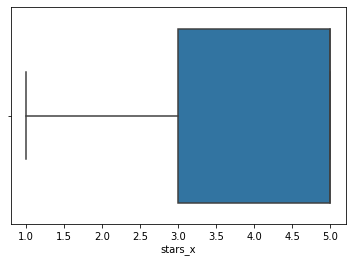

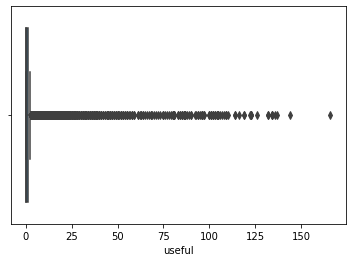

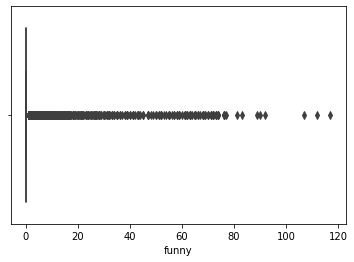

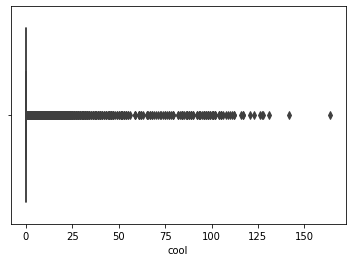

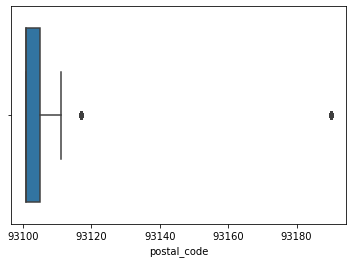

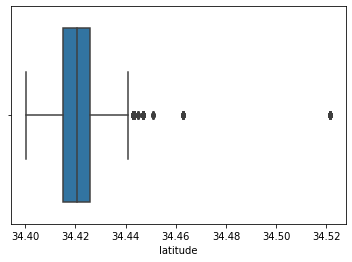

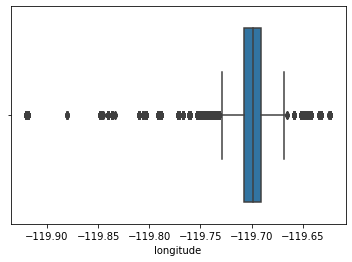

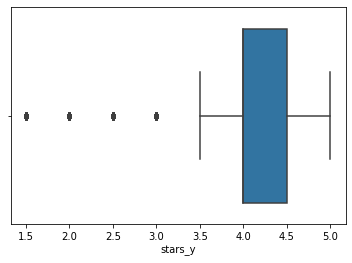

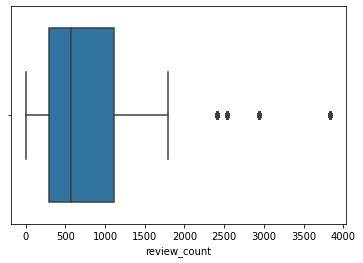

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col = Business_reviews.select_dtypes(include=['float','int']).columns
print(col)
for i in col:
  sns.boxplot(data=Business_reviews, x=i)
  plt.show()

##EDA - Nilisha

In [ ]:
#rename the column names from stars_x  to business overall _rating and stars_y to review_rating and name to business name
viz1=Business_reviews[['review_count','stars_x','name']].sort_values(by=['review_count'],ascending=False)

In [ ]:
viz1.groupby(['name', 'stars_x'])['review_count'].count()

In [ ]:
viz1.groupby(['name', 'stars_x'])['review_count'].count().unstack().fillna(0)

In [ ]:
#top_restaurant_names = Business_reviews.groupby(['name'])['review_count'].count().reset_index(name='count').sort_values(by=['count'],ascending=False).head(10)['name']
xyz = viz1.groupby(['name'])['review_count'].count().reset_index(name='count').sort_values(by=['count'],ascending=False).head(10)#.unstack().fillna(0)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=xyz, x="count", y="name",orient ="h",palette="Spectral",ax= ax)
plt.xlabel('Total Review Count')
plt.ylabel('Restaurant Names')
plt.title('Top 10 Highly Reviewed Restaurants')
#increase the size of the graph
# For each bar: Place a label

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                 

In [ ]:
viz2 = Business_reviews[['review_count','stars_x','categories']]

In [ ]:
abc=viz2.groupby(['categories'])['review_count'].count().reset_index(name='count').sort_values(by=['count'],ascending=False).head(10)#.unstack().fillna(0)


In [ ]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(abc['count'], labels = abc['categories'], colors = colors, autopct='%.0f%%')
plt.show()
              

In [ ]:
viz3 = Business_reviews[['stars_x','review_count','city','name']]

In [ ]:
scatterplot= viz3.groupby(['stars_x','name','city'])['review_count'].count().reset_index(name='count').sort_values(by=['count'],ascending=False)

In [ ]:
sns.scatterplot(data=scatterplot, x="stars_x", y="count")
plt.xlabel('Number of Reviews')
plt.ylabel('Ratings')
plt.title('Reviews V/s Ratings')

We are plotting rating v/s no. of reviews for all the restaurents in santa barbara. WE can see that higher the rating for a restaurant, more no. of people reviewing them on yelp. This could be because people are happy to share their positive experience on yelp.

In [ ]:
 viz3.groupby(['city'])['review_count'].count().reset_index(name='count').sort_values(by=['count'],ascending=False)

## EDA - Lina

In [ ]:
Business_reviews.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
1,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1.0,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
2,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3.0,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
3,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5.0,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"
4,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4.0,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


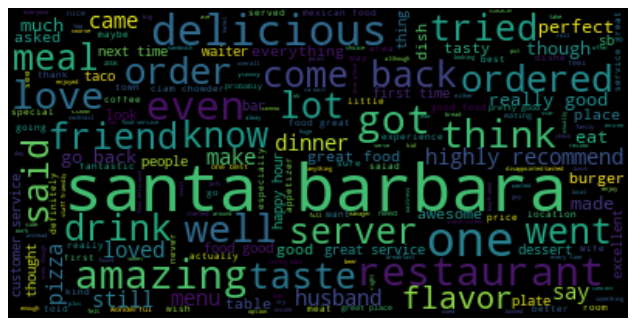

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
  
#nltk.download('punkt')
#nltk.download('stopwords')
stop = stopwords.words('english')
review=list(Business_reviews['text'])
clean=[]
for text in review:
  #remove any links
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
#Toknize String
  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))
# join the list and lowercase all the words
text = ' '.join(clean).lower()

#create the wordcloud object
wordcloud = WordCloud(
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

The wordcloud shows some common words in the reviews. Flavour seems to be something that has been used often. Pizza and burger do standout wrt to food indicating popularity in Santa Barbara. 'amazing' seems to be a highly used adjective in reviews. 'server' seems to also appear in reviews.

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
#wordnet for food domain
from nltk.corpus import wordnet as wn
#nltk.download('wordnet')
#nltk.download('omw-1.4')
food = wn.synset('food.n.02')
food=list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('lunch_meat.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.7/dist-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('headcheese.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.7/dist-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('haslet.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.7/dist-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('leg_of_lamb.n.01') at depth 5
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.7/dist-p

In [ ]:
new=[]
for c in clean:
  split=c.split(" ")
  filtered=[w for w in split if  w in food]
  new.append(filtered)


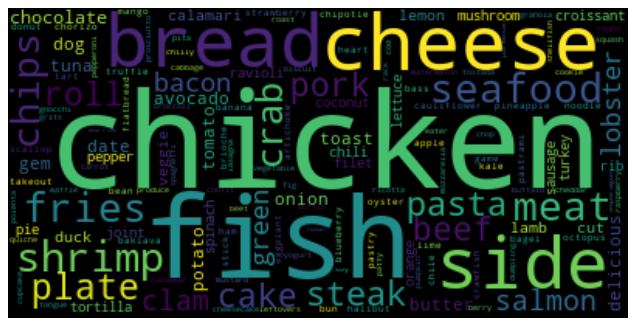

In [ ]:
new2=[]
for n in new:
  new2.append(" ".join([x.strip() for x in n]))
# join the list and lowercase all the words
text2 = ' '.join(new2).lower()

#create the wordcloud object
wordcloud = WordCloud(
                      collocations=False).generate(text2)

#plot the wordcloud object
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

After filtering out the non food related words, We get this wordcloud. Chicken, Fish, bread and cheese seem to be something that is frequenty ordered.

In [ ]:
new[767:8000]

[[],
 ['green',
  'ham',
  'blueberry',
  'scone',
  'blueberry',
  'scone',
  'green',
  'ham',
  'biscuit'],
 ['pastry'],
 ['produce', 'toast', 'tomato', 'side', 'chipotle', 'side'],
 ['gem', 'side', 'avocado', 'toast', 'chicken', 'bread'],
 ['Delicious', 'turkey', 'ham', 'avocado', 'bacon', 'bread'],
 ['gem', 'brioche', 'bacon', 'ricotta', 'toast', 'gem'],
 ['bacon', 'cheddar', 'biscuit'],
 ['dog', 'green', 'ham', 'biscuit', 'chicken'],
 ['toast',
  'strawberry',
  'brioche',
  'toast',
  'avocado',
  'toast',
  'loaf',
  'avocado',
  'toast',
  'brioche',
  'toast',
  'toast'],
 ['baguette', 'meat', 'cheese'],
 ['bun'],
 ['brioche'],
 ['biscuit',
  'butter',
  'butter',
  'biscuit',
  'brioche',
  'bun',
  'bacon',
  'chicken',
  'banana',
  'bread',
  'avocado',
  'toast',
  'roll'],
 [],
 ['side'],
 ['bacon'],
 [],
 ['chocolate', 'croissant'],
 ['bun'],
 [],
 ['blueberry',
  'lemon',
  'scone',
  'roll',
  'yogurt',
  'granola',
  'avocado',
  'toast',
  'bread',
  'cheese',
  'a

In [ ]:
#converting lists into dictionary to save them in csv
d ={}
d['new']= new[767:8000]
wordnet = pd.DataFrame(d)
wordnet.head() 

,new
0,[]
1,"[green, ham, blueberry, scone, blueberry, scon..."
2,[pastry]
3,"[produce, toast, tomato, side, chipotle, side]"
4,"[gem, side, avocado, toast, chicken, bread]"


In [ ]:
wordnet.to_csv('wordnet_food.csv',index=False)

In [ ]:
Business_reviews['tokens'] = new

# ABT

In [ ]:
Business_reviews.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories,tokens
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[plate]
1,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1.0,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[]
2,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3.0,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese","[roll, steak, chicken]"
3,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5.0,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[fish]
4,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4.0,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[]


In [ ]:
Business_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130445 entries, 0 to 130444
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   review_id     130445 non-null  object 
 1   user_id       130445 non-null  object 
 2   business_id   130445 non-null  object 
 3   stars_x       130445 non-null  float64
 4   useful        130445 non-null  int64  
 5   funny         130445 non-null  int64  
 6   cool          130445 non-null  int64  
 7   text          130445 non-null  object 
 8   date          130445 non-null  object 
 9   name          130445 non-null  object 
 10  address       130369 non-null  object 
 11  city          130445 non-null  object 
 12  state         130445 non-null  object 
 13  postal_code   130445 non-null  int64  
 14  latitude      130445 non-null  float64
 15  longitude     130445 non-null  float64
 16  stars_y       130445 non-null  float64
 17  review_count  130445 non-null  int64  
 18  attr

In [ ]:
top_20_businesses = Business_reviews[['business_id', 'review_count']].drop_duplicates().sort_values(by='review_count', ascending=True).head(10)

In [ ]:
top_20_business_ids = top_20_businesses['business_id']

In [ ]:
Business_reviews_for_top_20_businesses = Business_reviews[Business_reviews['business_id'].isin(top_20_business_ids)]

In [ ]:
#Business_reviews_for_top_20_businesses = Business_reviews
Business_reviews_for_top_20_businesses

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories,tokens
11069,7WnBquea-foLp-L2TZ-WQg,yY_K-l4f4Ho54CpiSMXxig,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,The Mill has been a pleasant surprise each tim...,2016-07-10 21:50:49,The Mill,...,Santa Barbara,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[dog]
11070,6w9HxHt6mEeml7ojnttvoA,wJGD1bV8Ecj84ql7lhq0eA,aYMpjij5ShtEoZueMrQPRw,1.0,13,0,0,I'm not a fan of racism. These owners were sup...,2018-04-09 02:51:12,The Mill,...,Santa Barbara,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[]
11071,y4Sj7smNjJZvLWDMmTbPIA,weom5rHPTmODQYXJA_jydg,aYMpjij5ShtEoZueMrQPRw,5.0,1,0,0,Came here for a lunch in for a wedding. Overal...,2017-03-18 02:21:07,The Mill,...,Santa Barbara,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...","[chicken, chili, fries]"
11072,DDie0nZMQ-8V_-x_wvHtOA,ZDCWEctaQHfJQT1sH_rMmA,aYMpjij5ShtEoZueMrQPRw,5.0,6,1,4,One of the neatest reclaimed spaces I've ever ...,2021-12-21 14:23:37,The Mill,...,Santa Barbara,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[]
11073,FU3n88dhfr2NNBF6KBDmIw,CcnRgmhJxt87yHhqOOD5AQ,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,I absolutely love this spot! I like taking fri...,2017-06-09 23:36:06,The Mill,...,Santa Barbara,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[]
20620,2SVmai36r9TykBNniC2lEw,hgUSn_pO-HWU949eY4hCOA,AgiBcv5rKdV9QIO5yF7w8g,4.0,0,0,0,"People come to SB for the beach, here you go! ...",2014-06-20 14:45:52,Harbor of Santa Barbara Inc,...,Santa Barbara,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[]
20621,4C8ye4vMoi50JpPYcUbXmw,DD-jDM6ZO85sC6eeWYKsZw,AgiBcv5rKdV9QIO5yF7w8g,2.0,1,0,1,Ive spent too much time here.The dockage fees ...,2012-08-23 07:24:32,Harbor of Santa Barbara Inc,...,Santa Barbara,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[]
20622,fKQ173UboEqpKhS6-sDBHw,7Na1pUcEv3oF_QTRwZ-2iw,AgiBcv5rKdV9QIO5yF7w8g,5.0,2,2,4,"this place is gorgeous. Touristy , yes but bea...",2012-07-05 18:39:06,Harbor of Santa Barbara Inc,...,Santa Barbara,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[]
20623,pb5XwbG32Wuru2ZfSNweiQ,qGo2mdCJgAUq-g7COt2TXA,AgiBcv5rKdV9QIO5yF7w8g,2.0,1,0,1,Please make your restaurants and drink shops g...,2018-05-12 23:21:14,Harbor of Santa Barbara Inc,...,Santa Barbara,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[]
20624,1tThWSswVJi_KnMBMvnzeA,Um5hX2KeqKi6jysZan6aDw,AgiBcv5rKdV9QIO5yF7w8g,5.0,0,0,0,Beautiful place to bring the family and take i...,2012-06-22 23:36:11,Harbor of Santa Barbara Inc,...,Santa Barbara,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[]


In [ ]:
wordnet_food_domain = pd.DataFrame(new)
wordnet_food_domain

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,plate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,roll,steak,chicken,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,fish,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130440,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
130441,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
130442,roll,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
130443,roll,tuna,tuna,fish,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
foodnet_domain_list = new[767:8000]

In [ ]:
import numpy
print(Business_reviews_for_top_20_businesses[Business_reviews_for_top_20_businesses['text'].isin(foodnet_domain_list)])

Empty DataFrame
Columns: [review_id, user_id, business_id, stars_x, useful, funny, cool, text, date, name, address, city, state, postal_code, latitude, longitude, stars_y, review_count, attributes, categories, tokens]
Index: []

[0 rows x 21 columns]


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
Business_reviews_for_top_20_businesses['text'] = Business_reviews_for_top_20_businesses['text'].str.lower()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
Business_reviews_for_top_20_businesses['text'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


11069    the mill has been a pleasant surprise each tim...
11070    i'm not a fan of racism. these owners were sup...
11071    came here for a lunch in for a wedding. overal...
11072    one of the neatest reclaimed spaces i've ever ...
11073    i absolutely love this spot! i like taking fri...
Name: text, dtype: object

In [ ]:
Business_reviews_for_top_20_businesses['Tokenized'] = Business_reviews_for_top_20_businesses['text'].apply(lemmatize_text)
print(Business_reviews_for_top_20_businesses.head())

                    review_id                 user_id             business_id  \
11069  7WnBquea-foLp-L2TZ-WQg  yY_K-l4f4Ho54CpiSMXxig  aYMpjij5ShtEoZueMrQPRw   
11070  6w9HxHt6mEeml7ojnttvoA  wJGD1bV8Ecj84ql7lhq0eA  aYMpjij5ShtEoZueMrQPRw   
11071  y4Sj7smNjJZvLWDMmTbPIA  weom5rHPTmODQYXJA_jydg  aYMpjij5ShtEoZueMrQPRw   
11072  DDie0nZMQ-8V_-x_wvHtOA  ZDCWEctaQHfJQT1sH_rMmA  aYMpjij5ShtEoZueMrQPRw   
11073  FU3n88dhfr2NNBF6KBDmIw  CcnRgmhJxt87yHhqOOD5AQ  aYMpjij5ShtEoZueMrQPRw   

       stars_x  useful  funny  cool  \
11069      5.0       0      0     0   
11070      1.0      13      0     0   
11071      5.0       1      0     0   
11072      5.0       6      1     4   
11073      5.0       0      0     0   

                                                    text                 date  \
11069  the mill has been a pleasant surprise each tim...  2016-07-10 21:50:49   
11070  i'm not a fan of racism. these owners were sup...  2018-04-09 02:51:12   
11071  came here for a lunch in for

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def remove_stop_words(tokenized_list):
  filtered_sentence=[]
  for w in tokenized_list:
    if w not in stop_words:
        filtered_sentence.append(w)
  return filtered_sentence

In [ ]:
#stop word
stop_words = set(stopwords.words('english'))
Business_reviews_for_top_20_businesses['Tokenized'] = Business_reviews_for_top_20_businesses.Tokenized.apply(lambda x: remove_stop_words(x))
# emotions=emotions.drop(columns=['Unnamed: 0'])
Business_reviews_for_top_20_businesses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories,tokens,Tokenized
11069,7WnBquea-foLp-L2TZ-WQg,yY_K-l4f4Ho54CpiSMXxig,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,the mill has been a pleasant surprise each tim...,2016-07-10 21:50:49,The Mill,...,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[dog],"[mill, ha, pleasant, surprise, time, wife, gon..."
11070,6w9HxHt6mEeml7ojnttvoA,wJGD1bV8Ecj84ql7lhq0eA,aYMpjij5ShtEoZueMrQPRw,1.0,13,0,0,i'm not a fan of racism. these owners were sup...,2018-04-09 02:51:12,The Mill,...,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[],"[i'm, fan, racism., owner, super, rude, anothe..."
11071,y4Sj7smNjJZvLWDMmTbPIA,weom5rHPTmODQYXJA_jydg,aYMpjij5ShtEoZueMrQPRw,5.0,1,0,0,came here for a lunch in for a wedding. overal...,2017-03-18 02:21:07,The Mill,...,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...","[chicken, chili, fries]","[came, lunch, wedding., overall, nice, little,..."
11072,DDie0nZMQ-8V_-x_wvHtOA,ZDCWEctaQHfJQT1sH_rMmA,aYMpjij5ShtEoZueMrQPRw,5.0,6,1,4,one of the neatest reclaimed spaces i've ever ...,2021-12-21 14:23:37,The Mill,...,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[],"[one, neatest, reclaimed, space, i've, ever, s..."
11073,FU3n88dhfr2NNBF6KBDmIw,CcnRgmhJxt87yHhqOOD5AQ,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,i absolutely love this spot! i like taking fri...,2017-06-09 23:36:06,The Mill,...,CA,93101,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[],"[absolutely, love, spot!, like, taking, friend..."
20620,2SVmai36r9TykBNniC2lEw,hgUSn_pO-HWU949eY4hCOA,AgiBcv5rKdV9QIO5yF7w8g,4.0,0,0,0,"people come to sb for the beach, here you go! ...",2014-06-20 14:45:52,Harbor of Santa Barbara Inc,...,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[people, come, sb, beach,, go!, decent, sized,..."
20621,4C8ye4vMoi50JpPYcUbXmw,DD-jDM6ZO85sC6eeWYKsZw,AgiBcv5rKdV9QIO5yF7w8g,2.0,1,0,1,ive spent too much time here.the dockage fees ...,2012-08-23 07:24:32,Harbor of Santa Barbara Inc,...,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[ive, spent, much, time, here.the, dockage, fe..."
20622,fKQ173UboEqpKhS6-sDBHw,7Na1pUcEv3oF_QTRwZ-2iw,AgiBcv5rKdV9QIO5yF7w8g,5.0,2,2,4,"this place is gorgeous. touristy , yes but bea...",2012-07-05 18:39:06,Harbor of Santa Barbara Inc,...,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[place, gorgeous., touristy, ,, yes, beautiful..."
20623,pb5XwbG32Wuru2ZfSNweiQ,qGo2mdCJgAUq-g7COt2TXA,AgiBcv5rKdV9QIO5yF7w8g,2.0,1,0,1,please make your restaurants and drink shops g...,2018-05-12 23:21:14,Harbor of Santa Barbara Inc,...,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[please, make, restaurant, drink, shop, go, st..."
20624,1tThWSswVJi_KnMBMvnzeA,Um5hX2KeqKi6jysZan6aDw,AgiBcv5rKdV9QIO5yF7w8g,5.0,0,0,0,beautiful place to bring the family and take i...,2012-06-22 23:36:11,Harbor of Santa Barbara Inc,...,CA,93101,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[beautiful, place, bring, family, take, scener..."


In [ ]:
#find length of tokenized comments after doing stop words
Business_reviews_for_top_20_businesses['word_count'] = Business_reviews_for_top_20_businesses.Tokenized.apply(lambda x: len(x))

#describe to see length distribution
print(Business_reviews_for_top_20_businesses.word_count.describe())

#check the info of the dataset
print(Business_reviews_for_top_20_businesses.info())

count     51.000000
mean      67.843137
std       63.294351
min       11.000000
25%       28.000000
50%       39.000000
75%       74.500000
max      251.000000
Name: word_count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 11069 to 113309
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     51 non-null     object 
 1   user_id       51 non-null     object 
 2   business_id   51 non-null     object 
 3   stars_x       51 non-null     float64
 4   useful        51 non-null     int64  
 5   funny         51 non-null     int64  
 6   cool          51 non-null     int64  
 7   text          51 non-null     object 
 8   date          51 non-null     object 
 9   name          51 non-null     object 
 10  address       45 non-null     object 
 11  city          51 non-null     object 
 12  state         51 non-null     object 
 13  postal_code   51 non-null     int64  
 14  lat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Get the foodnet list
flat_foodnet_list = [item for sublist in foodnet_domain_list for item in sublist]

#creating a set out of list to remove duplicates
flat_foodnet_set = [*set(flat_foodnet_list)]

In [ ]:
flat_foodnet_set

['scallion',
 'chop',
 'seafood',
 'chili',
 'dog',
 'produce',
 'cayenne',
 'sprinkles',
 'fritter',
 'tomatillo',
 'pheasant',
 'tripe',
 'mussel',
 'croissant',
 'cut',
 'smelt',
 'polenta',
 'joint',
 'coffeecake',
 'rack',
 'fennel',
 'pear',
 'leftovers',
 'bass',
 'chile',
 'kiwi',
 'carrot',
 'Host',
 'ham',
 'perch',
 'brioche',
 'romaine',
 'challah',
 'pumpkin',
 'milt',
 'cheddar',
 'spinach',
 'sole',
 'cracker',
 'greens',
 'fryer',
 'broccoli',
 'grape',
 'venison',
 'tomalley',
 'slop',
 'shrimp',
 'loin',
 'radish',
 'cornbread',
 'snapper',
 'vermicelli',
 'baguette',
 'cake',
 'heart',
 'yam',
 'roll',
 'cheese',
 'chilly',
 'steak',
 'carp',
 'snap',
 'steamer',
 'broiler',
 'frier',
 'shank',
 'chilli',
 'bonito',
 'sucker',
 'brisket',
 'veggie',
 'chorizo',
 'roast',
 'caviar',
 'crabmeat',
 'bread',
 'pineapple',
 'iceberg',
 'poultry',
 'bluepoint',
 'coconut',
 'granola',
 'neck',
 'cabbage',
 'wonton',
 'mullet',
 'bird',
 'chuck',
 'albacore',
 'tamarindo',


In [ ]:
print(Business_reviews_for_top_20_businesses[Business_reviews_for_top_20_businesses['Tokenized'].isin(flat_foodnet_set)])

Empty DataFrame
Columns: [review_id, user_id, business_id, stars_x, useful, funny, cool, text, date, name, address, city, state, postal_code, latitude, longitude, stars_y, review_count, attributes, categories, tokens, Tokenized, word_count]
Index: []

[0 rows x 23 columns]


In [ ]:
Business_reviews_for_top_20_businesses['Filtered_Tokens'] = Business_reviews_for_top_20_businesses['Tokenized'].apply(lambda x: set(x) & set(flat_foodnet_set)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Business_reviews_for_top_20_businesses.head(10)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,latitude,longitude,stars_y,review_count,attributes,categories,tokens,Tokenized,word_count,Filtered_Tokens
11069,7WnBquea-foLp-L2TZ-WQg,yY_K-l4f4Ho54CpiSMXxig,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,the mill has been a pleasant surprise each tim...,2016-07-10 21:50:49,The Mill,...,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[dog],"[mill, ha, pleasant, surprise, time, wife, gon...",73,{}
11070,6w9HxHt6mEeml7ojnttvoA,wJGD1bV8Ecj84ql7lhq0eA,aYMpjij5ShtEoZueMrQPRw,1.0,13,0,0,i'm not a fan of racism. these owners were sup...,2018-04-09 02:51:12,The Mill,...,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[],"[i'm, fan, racism., owner, super, rude, anothe...",25,{}
11071,y4Sj7smNjJZvLWDMmTbPIA,weom5rHPTmODQYXJA_jydg,aYMpjij5ShtEoZueMrQPRw,5.0,1,0,0,came here for a lunch in for a wedding. overal...,2017-03-18 02:21:07,The Mill,...,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...","[chicken, chili, fries]","[came, lunch, wedding., overall, nice, little,...",28,{chili}
11072,DDie0nZMQ-8V_-x_wvHtOA,ZDCWEctaQHfJQT1sH_rMmA,aYMpjij5ShtEoZueMrQPRw,5.0,6,1,4,one of the neatest reclaimed spaces i've ever ...,2021-12-21 14:23:37,The Mill,...,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[],"[one, neatest, reclaimed, space, i've, ever, s...",153,{}
11073,FU3n88dhfr2NNBF6KBDmIw,CcnRgmhJxt87yHhqOOD5AQ,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,i absolutely love this spot! i like taking fri...,2017-06-09 23:36:06,The Mill,...,34.421119,-119.690633,4.0,5,"{'BusinessParking': ""{'garage': False, 'street...","Breweries, Shopping, Food Court, Food, Venues ...",[],"[absolutely, love, spot!, like, taking, friend...",25,{}
20620,2SVmai36r9TykBNniC2lEw,hgUSn_pO-HWU949eY4hCOA,AgiBcv5rKdV9QIO5yF7w8g,4.0,0,0,0,"people come to sb for the beach, here you go! ...",2014-06-20 14:45:52,Harbor of Santa Barbara Inc,...,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[people, come, sb, beach,, go!, decent, sized,...",29,{}
20621,4C8ye4vMoi50JpPYcUbXmw,DD-jDM6ZO85sC6eeWYKsZw,AgiBcv5rKdV9QIO5yF7w8g,2.0,1,0,1,ive spent too much time here.the dockage fees ...,2012-08-23 07:24:32,Harbor of Santa Barbara Inc,...,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[ive, spent, much, time, here.the, dockage, fe...",29,{}
20622,fKQ173UboEqpKhS6-sDBHw,7Na1pUcEv3oF_QTRwZ-2iw,AgiBcv5rKdV9QIO5yF7w8g,5.0,2,2,4,"this place is gorgeous. touristy , yes but bea...",2012-07-05 18:39:06,Harbor of Santa Barbara Inc,...,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[place, gorgeous., touristy, ,, yes, beautiful...",22,{}
20623,pb5XwbG32Wuru2ZfSNweiQ,qGo2mdCJgAUq-g7COt2TXA,AgiBcv5rKdV9QIO5yF7w8g,2.0,1,0,1,please make your restaurants and drink shops g...,2018-05-12 23:21:14,Harbor of Santa Barbara Inc,...,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[please, make, restaurant, drink, shop, go, st...",50,{}
20624,1tThWSswVJi_KnMBMvnzeA,Um5hX2KeqKi6jysZan6aDw,AgiBcv5rKdV9QIO5yF7w8g,5.0,0,0,0,beautiful place to bring the family and take i...,2012-06-22 23:36:11,Harbor of Santa Barbara Inc,...,34.410475,-119.686843,3.5,5,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Active Life, Restaurants, Boating",[],"[beautiful, place, bring, family, take, scener...",17,{}


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Read csv files
Breads = pd.read_csv('/content/drive/My Drive/food_datasets/breads.csv')
red_meat = pd.read_csv('/content/drive/My Drive/food_datasets/red_meat.csv')
desert = pd.read_csv('/content/drive/My Drive/food_datasets/desert.csv')
sea_food = pd.read_csv('/content/drive/My Drive/food_datasets/sea_food.csv')
vegetable_food = pd.read_csv('/content/drive/My Drive/food_datasets/vegetable_food.csv')
white_meat = pd.read_csv('/content/drive/My Drive/food_datasets/white_meat.csv')

In [ ]:
# covert the data to list
breads_list = Breads['breads'].values.tolist()
desert_list = desert['desert'].values.tolist()
sea_food_list = sea_food['sea food'].values.tolist()
vegetable_food_list = vegetable_food['vegetable food'].values.tolist()
white_meat_list = white_meat['White meat'].values.tolist()
red_meat_list = red_meat['Red meat'].values.tolist()

In [ ]:
Business_reviews_for_top_20_businesses['breads'] = Business_reviews_for_top_20_businesses['Filtered_Tokens'].apply(lambda x: len(list(set(x) & set(breads_list))))
Business_reviews_for_top_20_businesses['Deserts'] = Business_reviews_for_top_20_businesses['Filtered_Tokens'].apply(lambda x: len(list(set(x) & set(desert_list))))
Business_reviews_for_top_20_businesses['Vegetable_food'] = Business_reviews_for_top_20_businesses['Filtered_Tokens'].apply(lambda x: len(list(set(x) & set(vegetable_food_list))))
Business_reviews_for_top_20_businesses['White_meat'] = Business_reviews_for_top_20_businesses['Filtered_Tokens'].apply(lambda x: len(list(set(x) & set(white_meat_list))))
Business_reviews_for_top_20_businesses['Red_meat'] = Business_reviews_for_top_20_businesses['Filtered_Tokens'].apply(lambda x: len(list(set(x) & set(red_meat_list))))
Business_reviews_for_top_20_businesses['Sea_food'] = Business_reviews_for_top_20_businesses['Filtered_Tokens'].apply(lambda x: len((set(x) & set(sea_food_list))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Business_reviews_for_top_20_businesses.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,tokens,Tokenized,word_count,Filtered_Tokens,breads,Deserts,Vegetable_food,White_meat,Red_meat,Sea_food
11069,7WnBquea-foLp-L2TZ-WQg,yY_K-l4f4Ho54CpiSMXxig,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,the mill has been a pleasant surprise each tim...,2016-07-10 21:50:49,The Mill,...,[dog],"[mill, ha, pleasant, surprise, time, wife, gon...",73,{},0,0,0,0,0,0
11070,6w9HxHt6mEeml7ojnttvoA,wJGD1bV8Ecj84ql7lhq0eA,aYMpjij5ShtEoZueMrQPRw,1.0,13,0,0,i'm not a fan of racism. these owners were sup...,2018-04-09 02:51:12,The Mill,...,[],"[i'm, fan, racism., owner, super, rude, anothe...",25,{},0,0,0,0,0,0
11071,y4Sj7smNjJZvLWDMmTbPIA,weom5rHPTmODQYXJA_jydg,aYMpjij5ShtEoZueMrQPRw,5.0,1,0,0,came here for a lunch in for a wedding. overal...,2017-03-18 02:21:07,The Mill,...,"[chicken, chili, fries]","[came, lunch, wedding., overall, nice, little,...",28,{chili},0,0,1,0,0,0
11072,DDie0nZMQ-8V_-x_wvHtOA,ZDCWEctaQHfJQT1sH_rMmA,aYMpjij5ShtEoZueMrQPRw,5.0,6,1,4,one of the neatest reclaimed spaces i've ever ...,2021-12-21 14:23:37,The Mill,...,[],"[one, neatest, reclaimed, space, i've, ever, s...",153,{},0,0,0,0,0,0
11073,FU3n88dhfr2NNBF6KBDmIw,CcnRgmhJxt87yHhqOOD5AQ,aYMpjij5ShtEoZueMrQPRw,5.0,0,0,0,i absolutely love this spot! i like taking fri...,2017-06-09 23:36:06,The Mill,...,[],"[absolutely, love, spot!, like, taking, friend...",25,{},0,0,0,0,0,0


In [ ]:
Business_reviews_for_top_20_businesses.groupby('user_id').agg(bread_count=pd.NamedAgg("breads",aggfunc=sum),
                                                              Sea_food_count=pd.NamedAgg("Sea_food",aggfunc=sum),
                                                              Deserts_count=pd.NamedAgg("Deserts",aggfunc=sum),
                                                              Vegetable_count=pd.NamedAgg("Vegetable_food",aggfunc=sum),
                                                              Red_meat_count=pd.NamedAgg("Red_meat",aggfunc=sum),
                                                              White_meat_count=pd.NamedAgg("White_meat",aggfunc=sum),)

,bread_count,Sea_food_count,Deserts_count,Vegetable_count,Red_meat_count,White_meat_count
user_id,,,,,,
0dI4DTdHUAaAgLkVCQr4xA,0,0,0,1,0,1
0wGk7sGVw_KpFEca7gR9oA,0,0,0,0,2,0
2z82VHOqdX1HC1Hzjau-Pg,0,0,0,0,1,0
41m9Kp_HCztXMr_Fx7eKQw,0,0,0,0,1,0
4DyMRBKrokax6d8LCI3GAw,0,3,0,1,0,0
5B9KDtNyTf1pHsKJ2B0nlg,0,0,0,0,2,0
66SCo2UIwTW8U_O893Eu4Q,0,0,0,0,0,1
7Na1pUcEv3oF_QTRwZ-2iw,0,0,0,0,0,0
7dfJhqSokPAAZkRmpozhjQ,1,1,0,3,1,1


In [ ]:
Business_reviews_for_top_20_businesses.to_csv('/content/drive/My Drive/ml_abt_creation/abt_count_bottom10.csv', index=False)

In [ ]:
#download and upload in the colab
!gdown --id 1C1tfrASOVOHVCKISGohwgU7lKxukiQgR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1C1tfrASOVOHVCKISGohwgU7lKxukiQgR
To: /content/abt_count_without_top20.csv
100% 307M/307M [00:01<00:00, 173MB/s]


In [ ]:
df = pd.read_csv('abt_count_top10.csv')

FileNotFoundError: ignored

# Checkpoint

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive/')
Business_reviews.to_csv('/content/drive/My Drive/DATA-245 Sec 11 - Machine Learning Tec/Dataset/checkpoint1.csv', index=False)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!gdown --id 1y0YIHMRSVqDrClpw7kl8EqA2JkIQpS3u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1y0YIHMRSVqDrClpw7kl8EqA2JkIQpS3u
To: /content/checkpoint1.csv
100% 236M/236M [00:01<00:00, 167MB/s]


In [ ]:
df_test = pd.read_csv('checkpoint1.csv')

In [ ]:
Business_reviews.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories,tokens
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[plate]
1,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1.0,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[]
2,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3.0,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese","[roll, steak, chicken]"
3,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5.0,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[fish]
4,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4.0,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54,Hibachi Steak House & Sushi Bar,...,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",[]


In [ ]:

def unique_values_in_list_of_lists(lst):
    result = set(x for l in lst for x in l)
    new_2 = result
    return new_2

list_m = unique_values_in_list_of_lists(new)
print(list_m)

{'chard', 'croissant', 'brain', 'shrimp', 'oreo', 'pike', 'potato', 'crumpet', 'tenderloin', 'baguet', 'pimiento', 'round', 'weenie', 'sirloin', 'turnip', 'lemon', 'tart', 'chitlins', 'knockwurst', 'spareribs', 'tripe', 'octopus', 'fritter', 'porkchop', 'bagel', 'brisket', 'plantain', 'challah', 'steamer', 'granola', 'porterhouse', 'side', 'bluefish', 'pepperoni', 'cucumber', 'grape', 'joint', 'yam', 'leftovers', 'squid', 'plum', 'headcheese', 'macaroon', 'confit', 'halal', 'herring', 'marrow', 'ghee', 'cauliflower', 'scallion', 'pancake', 'tagliatelle', 'lettuce', 'snap', 'bap', 'green', 'dodger', 'truffle', 'lime', 'roll', 'crawdad', 'pepper', 'eel', 'sunchoke', 'muscatel', 'fish', 'ricotta', 'crawfish', 'anchovy', 'mascarpone', 'meat', 'pumpkin', 'naan', 'cheesecake', 'spinach', 'sinker', 'salmon', 'crayfish', 'rigatoni', 'yoghurt', 'kiwi', 'escarole', 'citron', 'tuna', 'Parmesan', 'cracker', 'collards', 'broiler', 'eater', 'spud', 'venison', 'orange', 'sole', 'acerola', 'cake', 'St

In [ ]:
new_df = Business_reviews[['user_id','tokens']].copy()